# Zadanie 1

In [1]:
Pkg.add("FFTW")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
  [7a1cc6ca] + FFTW v0.2.4
  Updating `~/.julia/Manifest.toml`
  [621f4979] + AbstractFFTs v0.3.2
  [8f4d0f93] + Conda v1.2.0
  [7a1cc6ca] + FFTW v0.2.4
  [81def892] + VersionParsing v1.1.3


In [1]:
using Plots
using FFTW

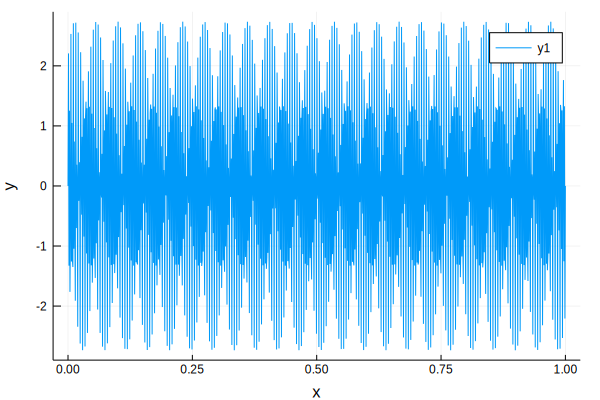

In [2]:
Fs = 1024;  
t = 0:1/(Fs-1):1
x = sin.(2*pi*t*200) + 2* sin.(2*pi*t*400)

plot(t,x, xlabel = "x", ylabel = "y",)


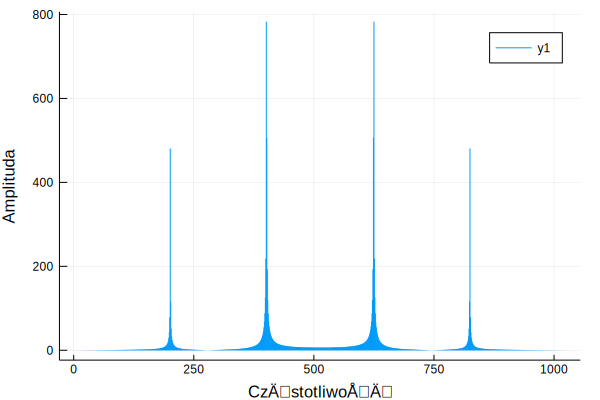

In [3]:
y=fft(x)
sticks((abs.(fft(x))); xlabel = "Częstotliwość [Hz]", ylabel = "Amplituda")

# Zadanie 2

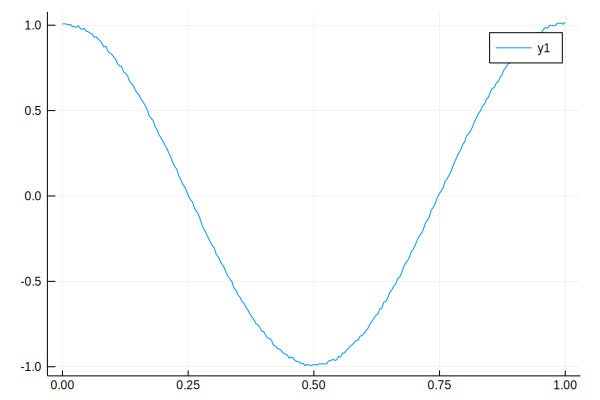

In [4]:
Fs = 256;  
t = 0:1/(Fs-1):1

cos1 = cos.(2*pi*t)
cos2 = map(x -> x + rand()/50, cos1)


plot(t, cos2)

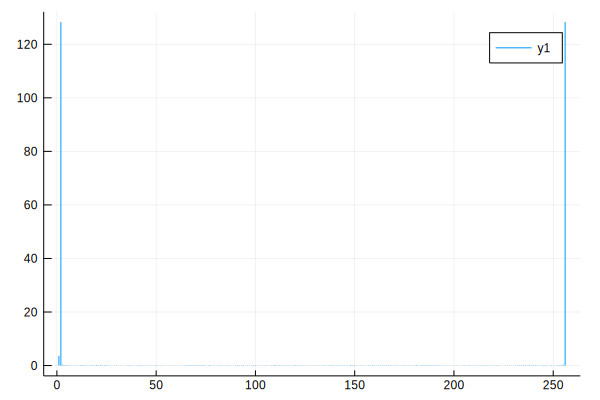

In [5]:
y=fft(cos2)
sticks((abs.(fft(cos2))))

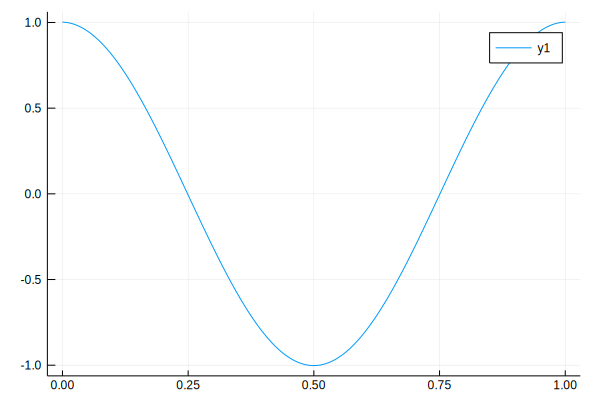

In [6]:
for (i,v) in enumerate(y)
    if abs.(v) <= 50
        y[i] = 0
    end
end
k = ifft(y)
plot(t, real(k))

# Zadanie 3

In [79]:
Pkg.add("WAV")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/Project.toml`
  [f0f68f2c] + PlotlyJS v0.12.3
  Updating `~/.julia/Manifest.toml`
  [bf4720bc] + AssetRegistry v0.1.0
  [ad839575] + Blink v0.9.0
  [ffbed154] + DocStringExtensions v0.6.0
  [de31a74c] + FunctionalCollections v0.5.0
  [9fb69e20] + Hiccup v0.2.2
  [97c1335a] + JSExpr v0.5.0
  [50d2b5c4] + Lazy v0.13.2
  [1914dd2f] + MacroTools v0.4.4
  [ffc61752] + Mustache v0.5.10
  [a975b10e] + Mux v0.5.3
  [510215fc] + Observables v0.2.3
  [fa939f87] + Pidfile v1.1.0
  [a03496cd] + PlotlyBase v0.2.5
  [f0f68f2c] + PlotlyJS v0.12.3
  [0f1e0344] + WebIO v0.7.0
  [104b5d7c] + WebSockets v1.2.0
  [cc8bc4a8] + Widgets v0.4.4
  [7b1f6079] + FileWatching 


In [2]:
using WAV

In [14]:
snd, sampFreq = wavread("mownit.wav")
length, channels = size(snd)
duration = length/sampFreq
channel1 = snd[:,1]

timeArray = (0:(length-1)) / sampFreq
timeArray = timeArray * 1000

plot(timeArray, channel1)

In [9]:
y=fft(channel1)
sticks((abs.(fft(channel1))))

"/mnt/juliabox"

In [ ]:
for (i,v) in enumerate(y)
    if abs.(v) <= 200
        if abs.(v) >= 80
            y[i] = y[i] - 80
        else
            y[i] = 0
        end
    end
end
k = ifft(y)
j = real(k)
plot(timeArray, j)

In [ ]:
wavwrite(j, sampFreq, "/mnt/juliabox/output.wav")